In [97]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [98]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [99]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context ='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

In [100]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/encoded_car_data.csv')
data.head()

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

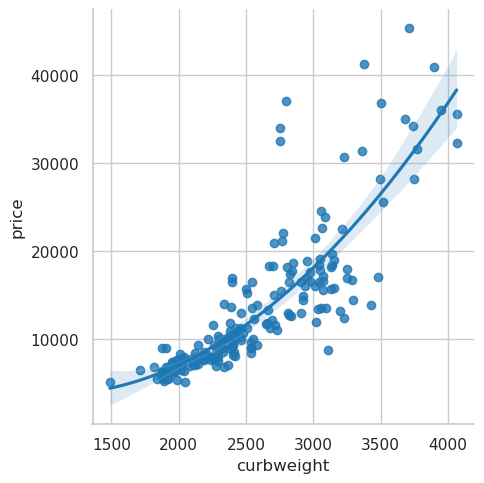

In [102]:
sns.lmplot(data=data,
           x='curbweight',
           y='price',
           order=2)
plt.show()

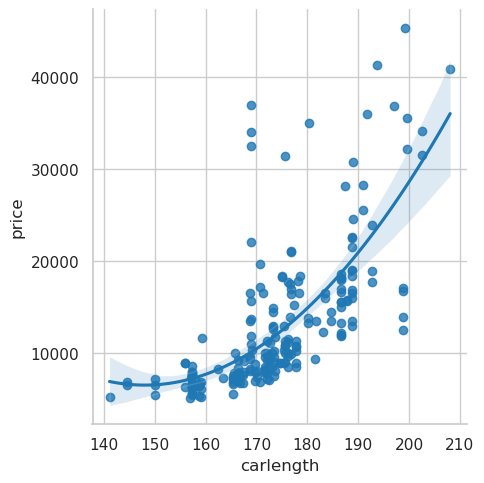

In [103]:
sns.lmplot(data=data,
           x='carlength',
           y='price',
           order=2)
plt.show()

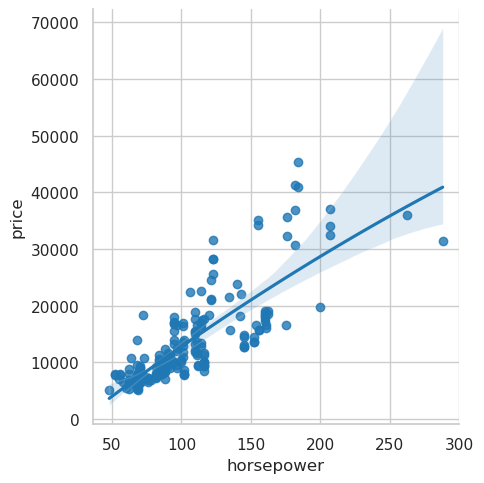

In [104]:

sns.lmplot(data=data,
           x='horsepower',
           y='price',
           order=2)
plt.show()

data preparation

In [105]:
X = data.drop('price', axis=1)
y = data.price

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Number of test samples: {X_test.shape[0]}')
print(f'Number of training samples: {X_train.shape[0]}')

Number of test samples: 62
Number of training samples: 143


In [107]:
lm = LinearRegression()

In [108]:
lm.fit(X_train, y_train)

LinearRegression()

In [109]:
predicted = lm.predict(X_test)

In [110]:
print(f'R^2 on training data: {lm.score(X_train, y_train)}')
print(f'R^2 on test data: {lm.score(X_test, y_test)}')

R^2 on training data: 0.9260519911659063
R^2 on test data: 0.8488476500423834


In [111]:
def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.kdeplot(y, color="r", label="Actual Value")
    sns.kdeplot(yhat, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

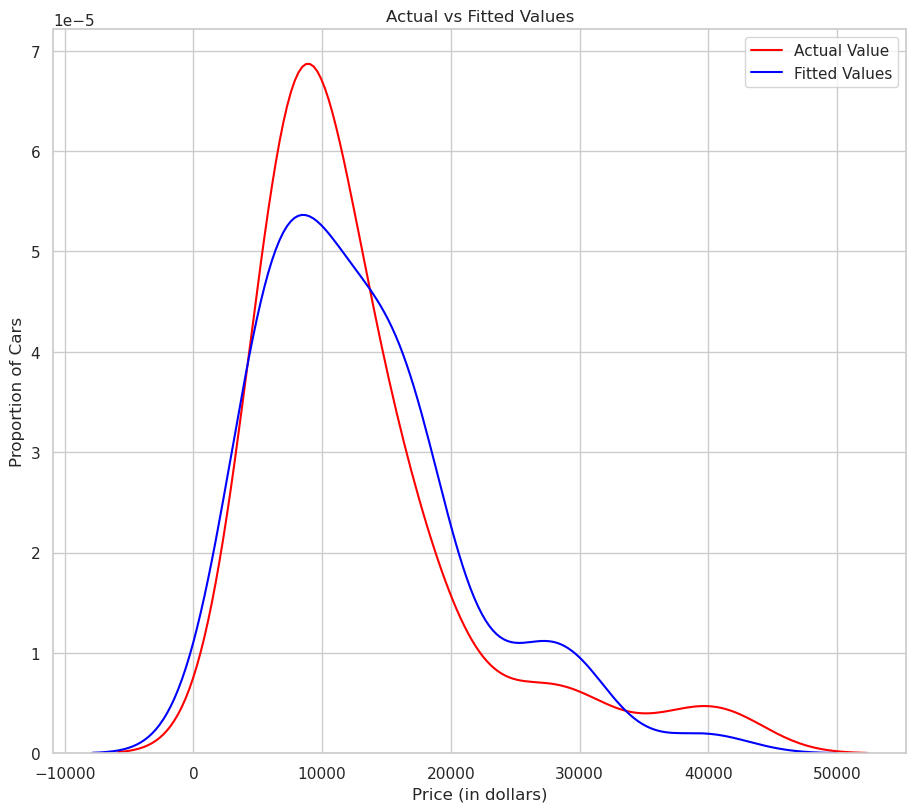

In [112]:
plot_dis(y_test, predicted)

In [113]:
{col:coef for col, coef in zip(X.columns, lm.coef_)}

{'diesel': 831913222608671.2,
 'gas': 831913222607230.4,
 'std': 265.817138671875,
 'turbo': -264.91015625,
 'convertible': 1772.9595489501953,
 'hardtop': 3023.3792724609375,
 'hatchback': -1723.89794921875,
 'sedan': -619.0015869140625,
 'wagon': -2452.8715209960938,
 '4wd': -568.2215728759766,
 'fwd': -232.0255126953125,
 'rwd': 855.8648681640625,
 'dohc': 2472.438751220703,
 'dohcv': -13345.657196044922,
 'l': 2227.9989013671875,
 'ohc': 4688.209747314453,
 'ohcf': 6033.189788818359,
 'ohcv': -2810.8487548828125,
 'rotor': 726.4886322021484,
 'eight': 9304.24674987793,
 'five': -2735.461212158203,
 'four': -5352.745178222656,
 'six': -2151.5219116210938,
 'three': 0.0,
 'twelve': 208.89024353027344,
 'two': 726.4573822021484,
 'wheelbase': 77.236328125,
 'curbweight': 5.125,
 'enginesize': 23.912109375,
 'boreratio': -1786.1702728271484,
 'horsepower': 69.234375,
 'carlength': -63.23828125,
 'carwidth': 575.81005859375,
 'citympg': -161.779296875,
 'highwaympg': 145.765625}

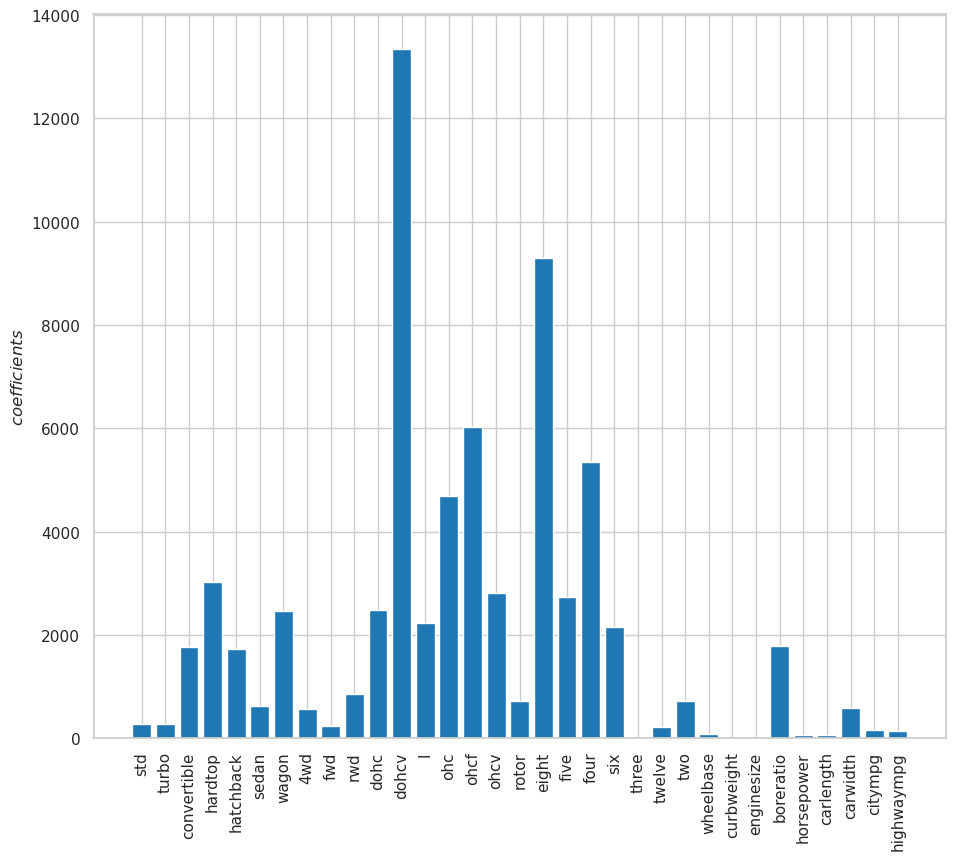

In [114]:
plt.bar(X.columns[2:], abs(lm.coef_[2:]))
plt.xticks(rotation=90)
plt.ylabel('$coefficients$')
plt.show()

In [115]:
X

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,two,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,109.1,2952.0,141.0,3.78,114.0,188.8,68.9,23.0,28.0
201,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,109.1,3049.0,141.0,3.78,160.0,188.8,68.8,19.0,25.0
202,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,109.1,3012.0,173.0,3.58,134.0,188.8,68.9,18.0,23.0
203,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,109.1,3217.0,145.0,3.01,106.0,188.8,68.9,26.0,27.0


In [116]:
def get_R2_features(model,test=True): 
    #X: global  
    features=list(X)
    features.remove("three")
    
    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(X_train[[feature]],y_train)
        
        R_2_test.append(model.score(X_test[[feature]],y_test))
        R_2_train.append(model.score(X_train[[feature]],y_train))
        
    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )



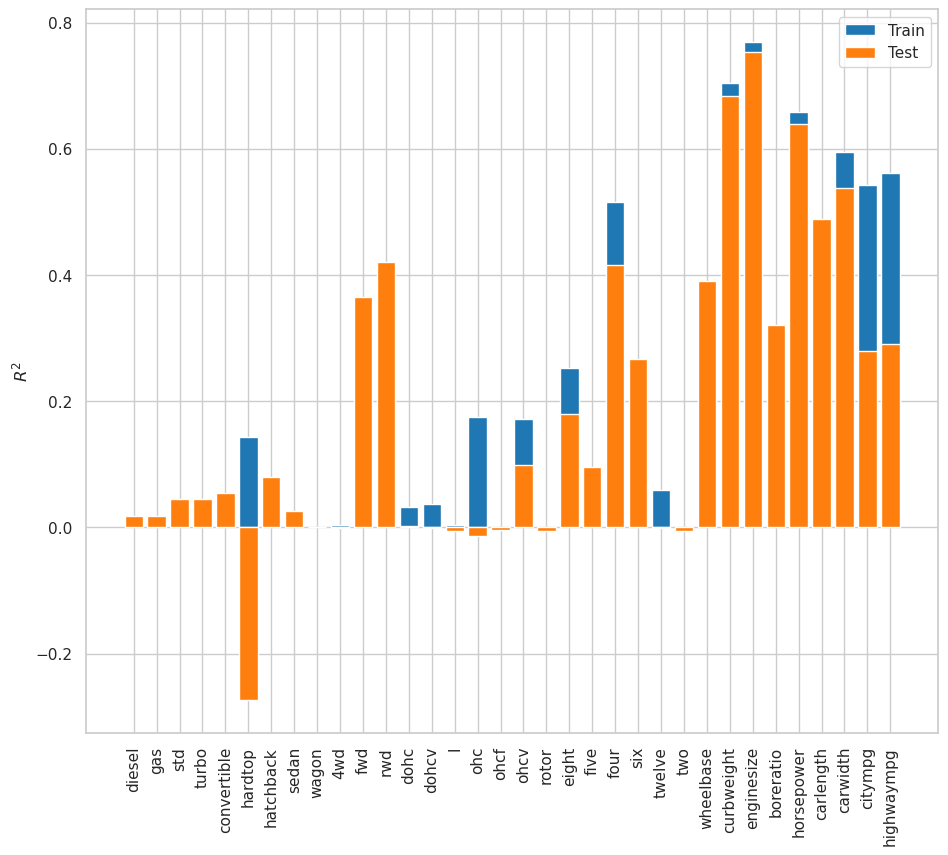

Training R^2 mean value 0.21817773426877915 Testing R^2 mean value 0.18241493035139267 
Training R^2 max value 0.7686929078033781 Testing R^2 max value 0.7534902447506853 


In [117]:
get_R2_features(lm)

R^2 on training  data  0.9262644464932701
R^2 on testing data  -1.1623164870228657e+21


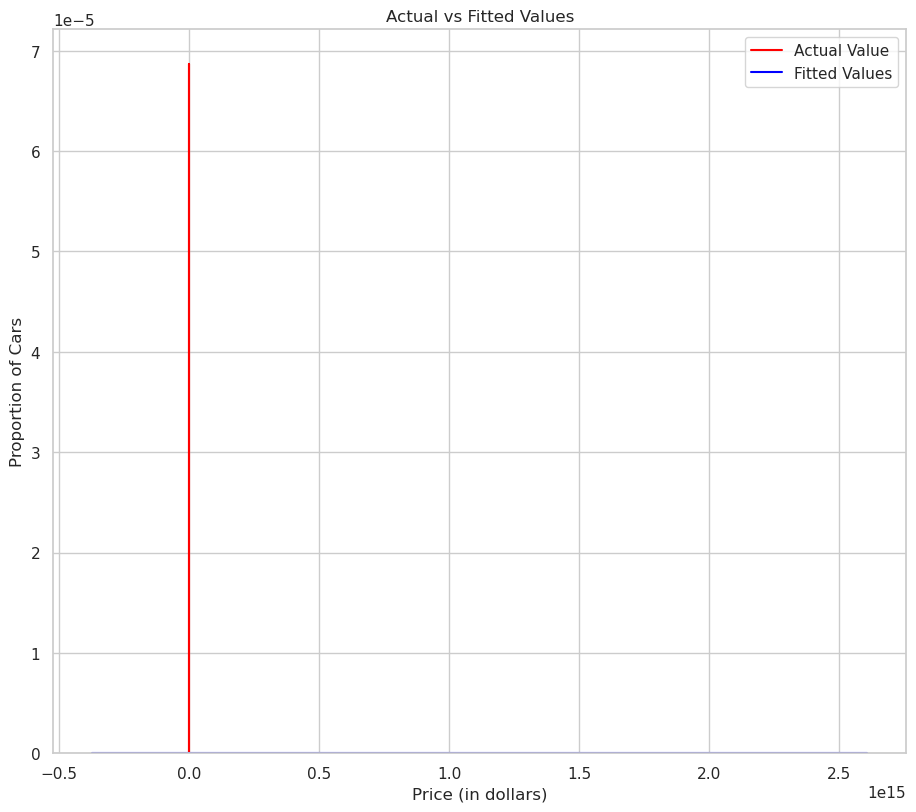

In [118]:
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
pipe.fit(X_train,y_train)
print("R^2 on training  data ", pipe.score(X_train, y_train))
print("R^2 on testing data ", pipe.score(X_test,y_test))
predicted = pipe.predict(X_test)
plot_dis(y_test,predicted)
plt.show()

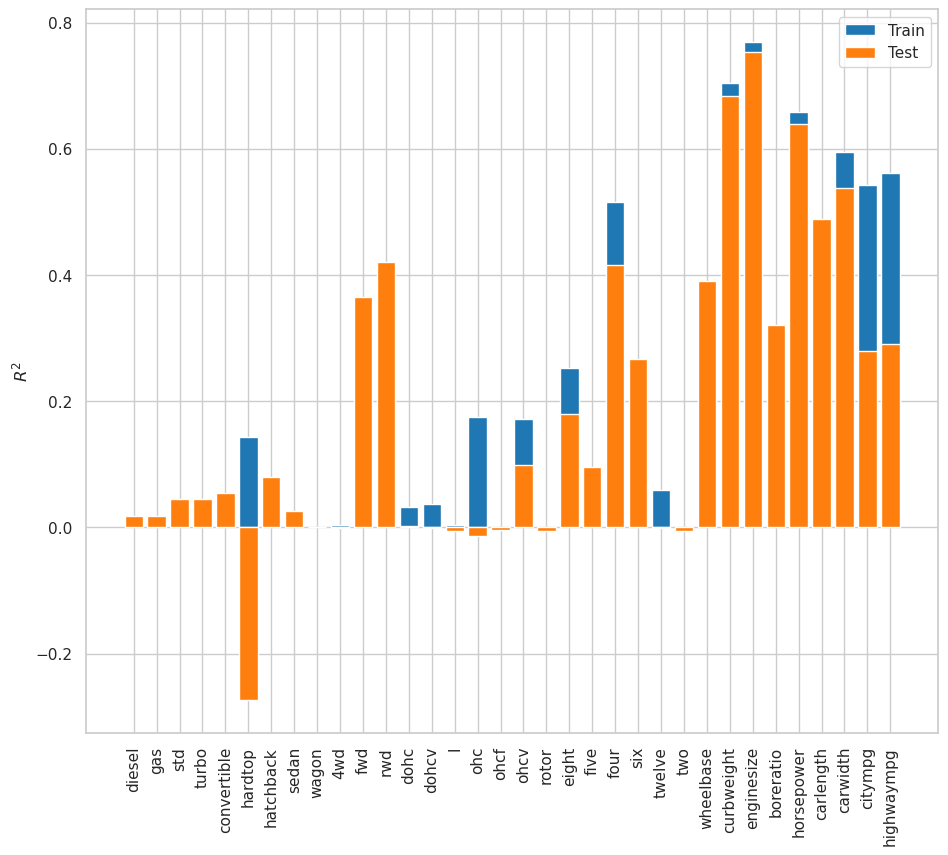

Training R^2 mean value 0.21817773426877918 Testing R^2 mean value 0.18241493035139264 
Training R^2 max value 0.7686929078033782 Testing R^2 max value 0.7534902447506853 


In [119]:
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
get_R2_features(pipe)

In [120]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [121]:
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

In [122]:
print(f'Original shape: {X_train_poly.shape}')
print(f'Poly shape: {X_test_poly.shape}')

Original shape: (143, 665)
Poly shape: (62, 665)


In [123]:
lm = LinearRegression()
lm.fit(X_train_poly, y_train)

LinearRegression()

In [124]:
predicted = lm.predict(X_test_poly)

In [125]:
print("R^2 on training data:", lm.score(X_train_poly, y_train))
print("R^2 on testing data:", lm.score(X_test_poly,y_test))

R^2 on training data: 0.9985318497975866
R^2 on testing data: -36729.958122784825


In [126]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model', LinearRegression())]


In [127]:

pipe=Pipeline(Input)
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [128]:
print("R^2 on training  data:", pipe.score(X_train, y_train))
print("R^2 on testing data:", pipe.score(X_test,y_test))

R^2 on training  data: 0.9985318497975866
R^2 on testing data: -36729.958122784825


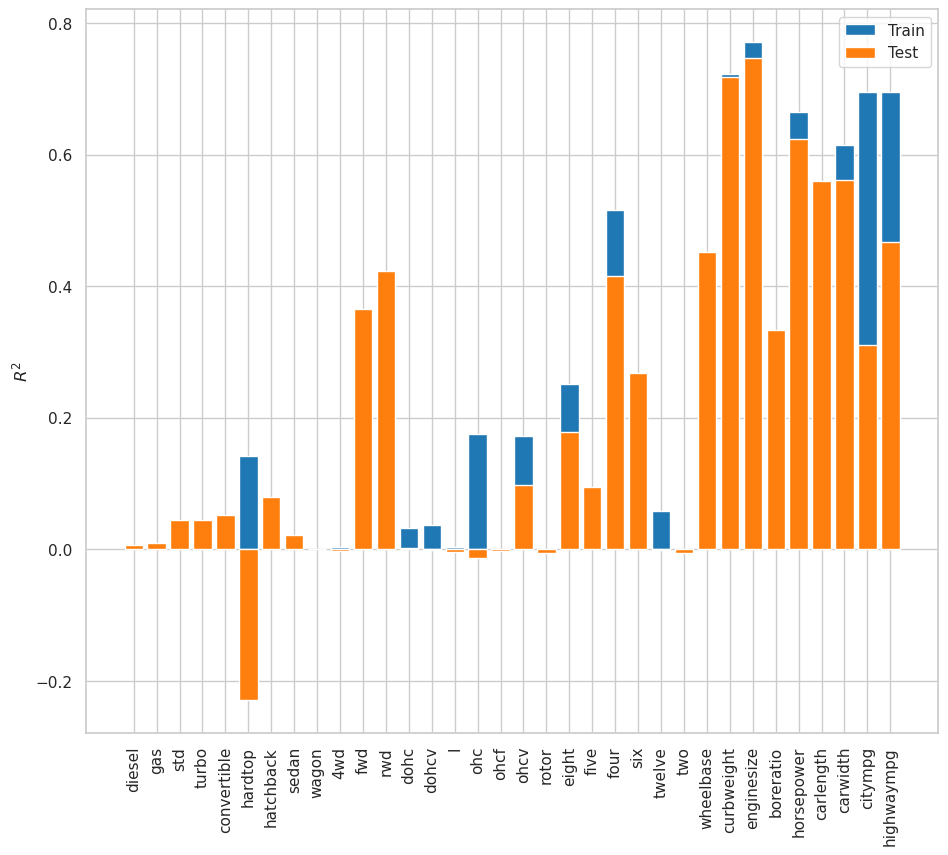

Training R^2 mean value 0.23069252321877018 Testing R^2 mean value 0.19452203983592456 
Training R^2 max value 0.7706959974452947 Testing R^2 max value 0.7463370080614308 


In [129]:
get_R2_features(pipe)

In [130]:
Input = [
    ('polynomial', PolynomialFeatures(include_bias=False, degree=2)),
    ('model', LinearRegression())
]

pipe = Pipeline(Input)


In [131]:
param_grid = {
    'polynomial__degree': [1, 2, 3, 4],
    'model': [LinearRegression(), 'passthrough'],  # Usar estimadores válidos o 'passthrough'
    #'model': [True, False, 'passthrough'],  
}

In [132]:
search = GridSearchCV(pipe, param_grid, n_jobs=1)

In [133]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [134]:
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', LinearRegression())]),
             n_jobs=1,
             param_grid={'model': [LinearRegression(), 'passthrough'],
                         'polynomial__degree': [1, 2, 3, 4]})

In [135]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('model', LinearRegression())])

In [136]:
best.score(X_test,y_test)


0.8467665953994743

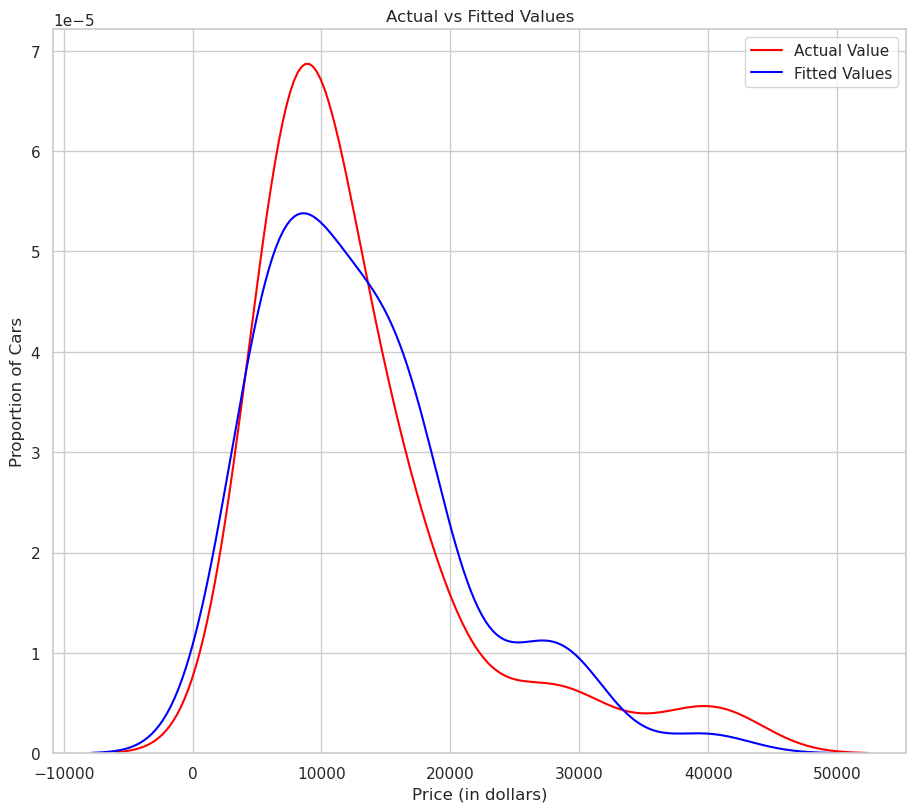

In [137]:
predicted=best.predict(X_test)
plot_dis(y_test,predicted)

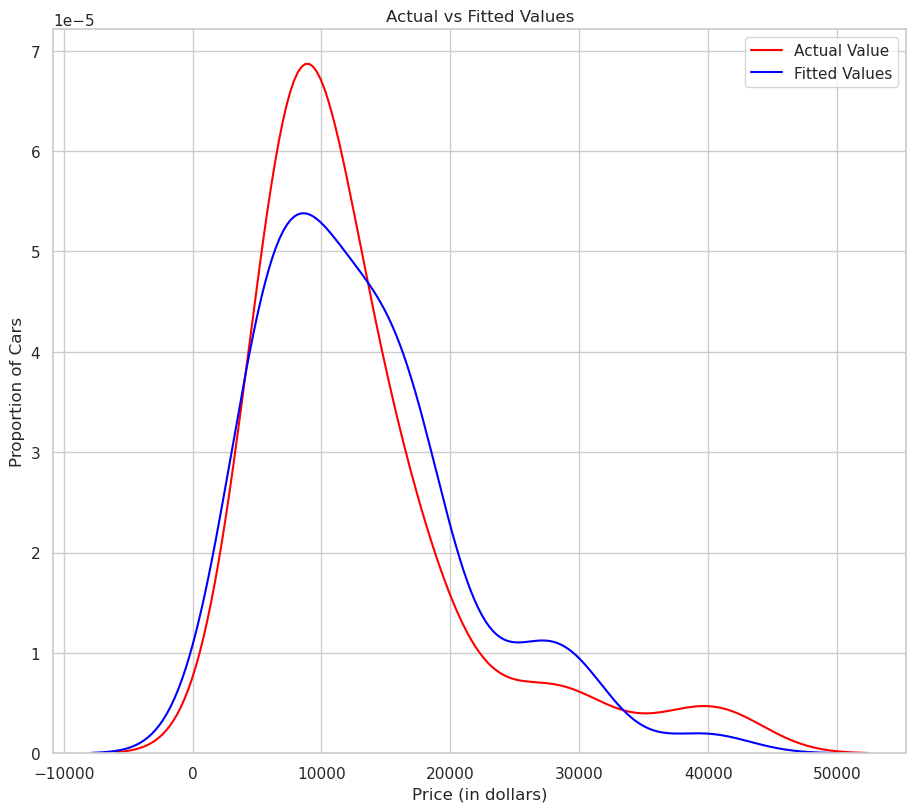

In [138]:
predicted=best.predict(X_test)
plot_dis(y_test,predicted)